In [20]:
import cv2
from  matplotlib import pyplot as plt
import numpy as np
import os

imagine shape:  (600, 600)


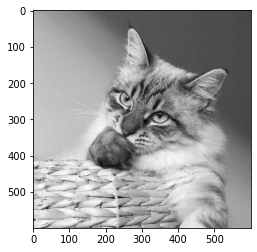

In [21]:
# readin picture
img = cv2.imread("origin.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

h = gray.shape[0]
w = gray.shape[1]

print('imagine shape: ',gray.shape)

plt.imshow(gray, cmap ='gray')
plt.show()

In [22]:
# LoG
def LoG(x:int, y:int, sigma:float):
    return (x**2+y**2-2*(sigma**2))*np.exp(-(x**2+y**2)/(2*(sigma**2)))

def get_kernel(sigma:float):
    kernel_size = 2*int(3*sigma)+1
    r = int((kernel_size-1)/2)
    conv_kernel = np.zeros((kernel_size,kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            conv_kernel[i,j] = LoG(i-r,j-r,sigma)
    conv_kernel = conv_kernel/np.sum(conv_kernel)
    return int(kernel_size),conv_kernel

# calculate conv
def conv(pic:np.ndarray, kernel:np.ndarray):
    h,w = pic.shape

    kernel_size,_ = kernel.shape
    kernel_r = int((kernel_size-1)/2)

    extend_gray = np.pad(pic,((kernel_r,kernel_r),(kernel_r,kernel_r)),'edge')

    result = np.zeros((h,w))
    for i in range(kernel_r,h+kernel_r):
        for j in range(kernel_r,w+kernel_r):
            result[i-kernel_r,j-kernel_r] = np.sum(extend_gray[i-kernel_r:i+kernel_r+1,j-kernel_r:j+kernel_r+1]*kernel)
        
    return result


In [23]:
# generate scale sapce
base_sigma = 1.6
layer_num = 5

# whether store the pictues in scale space 
pic_store = True
if pic_store and not(os.path.exists('result')):
    os.mkdir('result')

kernel_sizes = np.zeros(layer_num) 
scale_sapce = np.zeros((layer_num,h,w))

for i in range(layer_num):
    kernel_sizes[i],kernel = get_kernel(base_sigma*2**i)
    scale_sapce[i] = conv(gray,kernel)
    if pic_store:
        cv2.imwrite('result/'+str(i)+'.png',scale_sapce[i])


FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'result'

In [ ]:
# get scale invariant points
points = []
count = 0
for i in range(1,layer_num+1):
    for j in range(1,h-1):
        for k in range(1,w-1):
            compare_matrix = scale_sapce[i-1:i+2,j-1:j+2,k-1:k+2]
            max_index = np.argmax(compare_matrix)
            if max_index==13 :
                position,_,_ = np.where(compare_matrix==compare_matrix[1,1,1])
                if position.shape[0] == 1:
                    points.append(np.array([k,j,i]))

1303


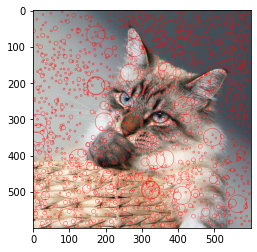

In [ ]:
# virtualize
print('num of points: ', len(points))
for point in points:
    cv2.circle(img,(int(point[0]),int(point[1])),int(base_sigma*2**point[2]),(255,0,0))
plt.imshow(img)
plt.show()